
Environment: Python 3.6.5 and Jupyter notebook


## 1. Introduction

#### AIM:
For this task, we are required to do graphical and non-graphical to analyse the dataset, find and fix errors present in various columns of the given dataset.

#### ABOUT THE DATASET:
We are given a dataset of delivering packages using drones in Victoria, Australia.It contains around 16 columns and 37,681 rows. The 16 variables given are as follows:

Id: A unique id for the delivery  
Drone type: A categorical attribute for the type of the drone  
Post type: A categorical attribute for the type of deliver  
Package weight:The weight of the package  
Origin region:A categorical attribute representing the region for the origin of the delivery  
Destination region:A categorical attribute representing the region for the destination of the delivery  
Origin latitude:Latitude of the origin  
Origin longitude: Longitude of the origin  
Destination latitude:Latitude of the destination  
Destination longitude:Longitude of the destination  
Journey Distance:Distance of the journey  
Departure date:Date of the departure  
Departure time:Time of the departure  
Travel time:Travel time (i.e., duration) of the journey  
Delivery time:The time of the delivery  
Delivery Fare: Delivery price.    

## 2.Importing the required packages and the given dataset

In [1347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter

#Reading in the file
myfile=pd.read_csv('29330750.csv')
myfile2=myfile

## 3. Performing EDA on the given dataset

In [1312]:
#Checking the shape of the dataframe
print('The shape of the dataframe: ' + str(myfile.shape) + '\n')

The shape of the dataframe: (37681, 16)



In [1313]:
#Analysing the head of the dataframe 
print('The head of the dataframe:'  + '\n' + str(myfile.head()))

The head of the dataframe:
             Id  Drone Type  Post Type  Package Weight  Origin Region  \
0  ID1471251440         1.0        0.0          46.124           10.0   
1  ID5809009983         1.0        1.0          44.373           28.0   
2  ID1751041840         1.0        0.0          11.942           48.0   
3  ID1597582772         2.0        0.0          39.338           36.0   
4  ID1181129613         1.0        0.0          42.312            3.0   

   Destination Region  Origin Latitude  Origin Longitude  \
0                24.0       -37.248577        144.462153   
1                20.0       -38.412837        144.457607   
2                50.0       -38.398325        143.068291   
3                30.0       -38.709436        143.815376   
4                 3.0       -37.632102        143.122302   

   Destination Latitude  Destination Longitude  Journey Distance  \
0            -38.373328             146.255488           201.362   
1            -36.536657             1

In [1183]:
#Getting basic infromation about the dataset
print((myfile.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37681 entries, 0 to 37680
Data columns (total 16 columns):
Id                       37656 non-null object
Drone Type               37671 non-null float64
Post Type                37661 non-null float64
Package Weight           37681 non-null float64
Origin Region            37671 non-null float64
Destination Region       37671 non-null float64
Origin Latitude          37681 non-null float64
Origin Longitude         37681 non-null float64
Destination Latitude     37681 non-null float64
Destination Longitude    37681 non-null float64
Journey Distance         37681 non-null float64
Departure Date           37681 non-null object
Departure Time           37681 non-null object
Travel Time              37641 non-null float64
Delivery Time            37681 non-null object
Delivery Fare            37651 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.6+ MB
None


In [1184]:
#A brief description about the dataset
myfile.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,37671.000000,37661.000000,37681.000000,37671.000000,37671.000000,37681.000000,37681.000000,37681.000000,37681.000000,37681.000000,37641.000000,37651.000000
mean,1.700167,0.301665,26.756473,26.549043,26.282472,-37.638723,145.571427,-37.646208,145.568180,221.924205,213.600073,159.987338
std,0.779182,0.458987,12.731449,15.005454,15.008403,1.896121,6.943553,1.891486,6.921496,115.842926,109.040475,72.561146
min,1.000000,0.000000,5.002000,1.000000,1.000000,-39.006980,-148.326707,-39.006980,-148.228399,1.092000,7.710000,69.840000
25%,1.000000,0.000000,15.785000,14.000000,13.000000,-38.343735,144.190218,-38.347754,144.207598,132.888000,129.550000,124.710000
50%,2.000000,0.000000,26.589000,26.000000,26.000000,-37.633637,145.665962,-37.643577,145.664152,209.735000,201.940000,151.630000
75%,2.000000,1.000000,37.687000,40.000000,39.000000,-36.985971,147.296036,-36.987712,147.287236,299.110000,285.530000,182.895000
max,3.000000,1.000000,57.998000,52.000000,52.000000,38.820591,148.451049,38.867235,148.451049,554.016000,543.000000,1437.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CC5F54588>,
      dtype=object)

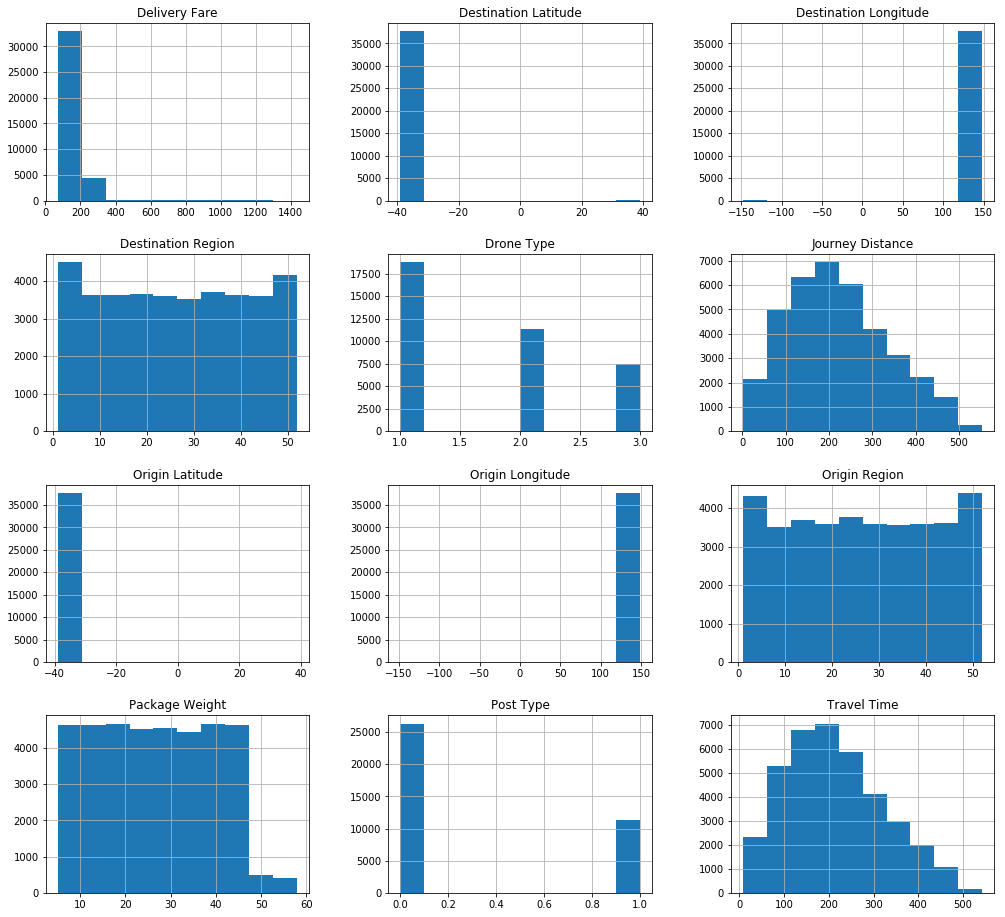

In [1185]:
#Checking the distribution of the columns
plot1=myfile.hist(figsize=(17,16))
plot1

### From the above plots, we can have a basic idea of the distribution of various columns of the dataset and its variance. From the above plots we can explore that:

1.There may be outliers present in the delivery fare column.   
2.There is something wrong in the latitude and longitude values as we can see some positive values of latitude and some negative values of longitude which is not possible as the drone data is from Victoria, Austraila.  
3.There are only 3 discrete values for drone type and 2 discrete values for post type   
4.There may be some outliers present in package weight  



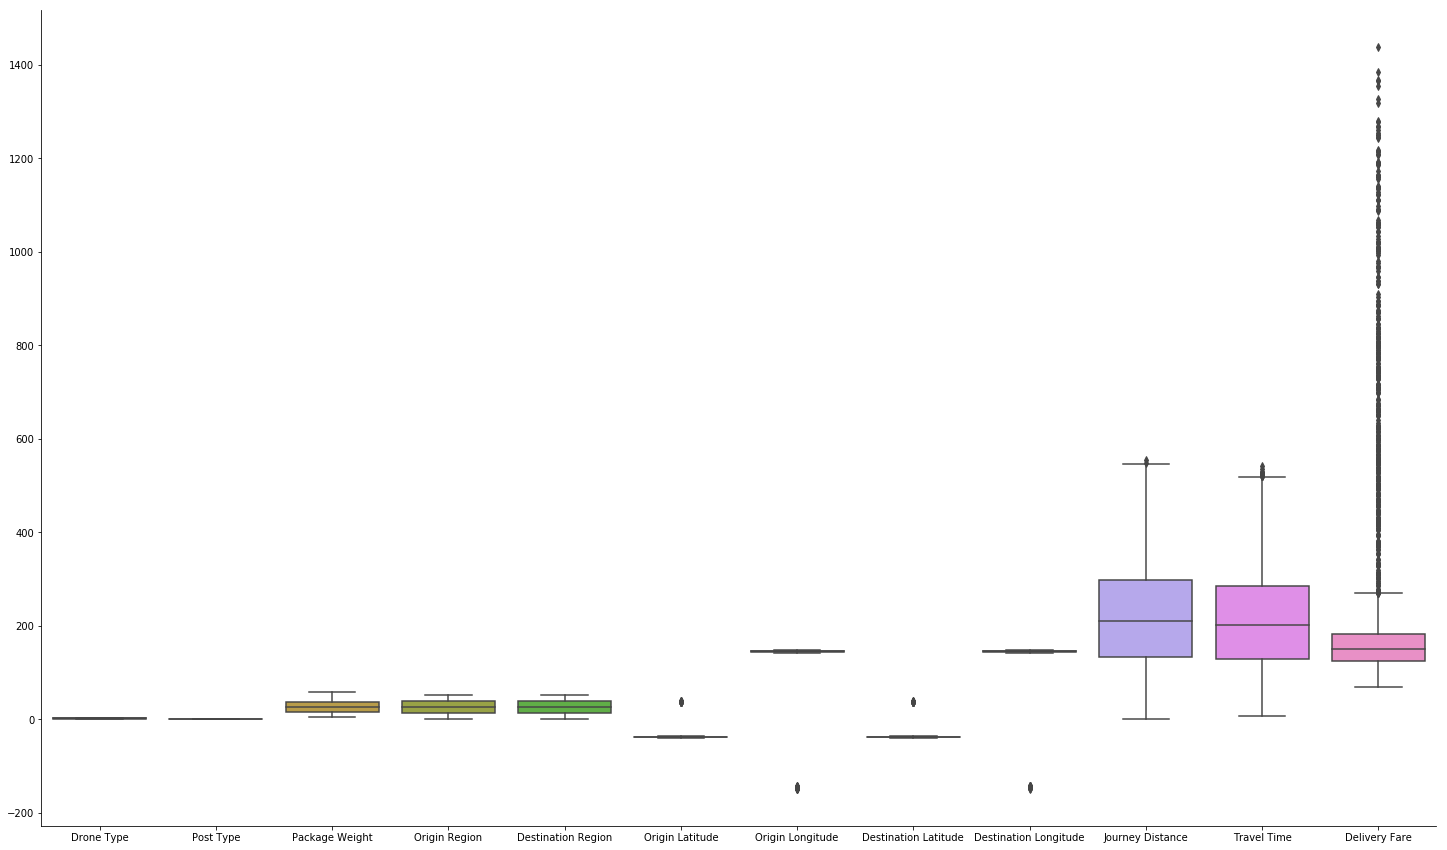

In [1314]:
#Boxlot to find the presence of outliers
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.boxplot(data=myfile, ax=ax)    
sns.despine()

### Checking the null values present in the dataset

In [1315]:
nulls=myfile.isna().sum()
nulls

Id                       25
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

### Removing null Ids as there is no way to impute IDs as they are supposed to be unique for  each row

In [1348]:
#Dropping only rows which contain null values in Id
myfile=myfile.dropna(subset=['Id'])
nulls=myfile.isna().sum()
nulls

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

In [1349]:
####Dropping rows that are complete duplicates from the dataset
myfile=myfile.drop_duplicates(keep='first')
print(len(myfile['Id'].unique()))

37621


### Plotting the correlation among all the variables

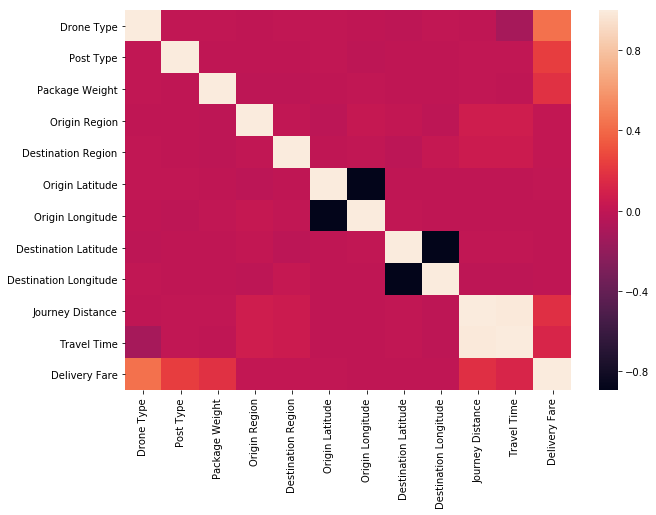

In [1318]:
corr = myfile.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [1194]:
#To crosscheck, printing the correlation matrix
corr

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Drone Type,1.000000,0.007322,0.003262,-0.000891,0.005526,0.006850,-0.004198,-0.007245,0.002008,-0.000700,-0.110230,0.430689
Post Type,0.007322,1.000000,-0.004747,-0.003238,0.000108,0.007883,-0.008452,-0.002646,-0.000667,0.006681,0.005784,0.231672
Package Weight,0.003262,-0.004747,1.000000,-0.009687,-0.009784,-0.003725,0.002271,-0.002726,0.000051,0.001239,0.000106,0.184215
Origin Region,-0.000891,-0.003238,-0.009687,1.000000,0.004040,-0.019901,0.029681,0.013001,-0.011600,0.068954,0.069064,0.011069
Destination Region,0.005526,0.000108,-0.009784,0.004040,1.000000,-0.004401,0.002871,-0.015858,0.024153,0.057531,0.056401,0.015409
Origin Latitude,0.006850,0.007883,-0.003725,-0.019901,-0.004401,1.000000,-0.894353,-0.002263,0.000511,-0.004334,-0.004863,0.004351
Origin Longitude,-0.004198,-0.008452,0.002271,0.029681,0.002871,-0.894353,1.000000,0.001428,-0.001796,-0.001437,-0.001337,-0.005276
Destination Latitude,-0.007245,-0.002646,-0.002726,0.013001,-0.015858,-0.002263,0.001428,1.000000,-0.894362,0.004694,0.005320,-0.005258
Destination Longitude,0.002008,-0.000667,0.000051,-0.011600,0.024153,0.000511,-0.001796,-0.894362,1.000000,-0.010776,-0.010450,-0.000089
Journey Distance,-0.000700,0.006681,0.001239,0.068954,0.057531,-0.004334,-0.001437,0.004694,-0.010776,1.000000,0.990283,0.176088


Findings:    
1. Delivery Fare has a positive corelation with Drone Type, Post Type, Package weight, Journey Distance and Travel time.  
2. Drone Type and Delivery fare seems to have a negative corelation. 
3. There is a very high positive corelation between Travel time and Journey Distance which totally makes sense.  

In [51]:
#Checking the 'Departure Date'
#myfile['Departure Date']=pd.to_datetime(myfile['Departure Date'], format='%Y-%m-%d').dt.date


ValueError: time data 2018-15-07 doesn't match format specified

While converting the Departure Date column to a datetime object, an error occured as the date is not in a single format, as it shows some months greater than 12, due to which it can not be converted to a datetime format.

### Converting all the Departure Date to a single format(YYYY-MM-DD)

In [1350]:
#Splitting the Departure date column on the basis of '-'
s=pd.DataFrame(myfile['Departure Date'].str.split('-').tolist(),columns = ['Year','Month','Date'])
#Checking unique values in the year column
s['Year'].unique()

#To check if month is greater than 12
a=s['Month'].unique()
a.sort()

#Converting the string columns to integer for comparison
s['Month']=s['Month'].astype(int)
s['Year']=s['Year'].astype(int)
s['Date']=s['Date'].astype(int)

#Checking values of month greater than 12
condition1 = s['Month']>12
#If the value for month is greater than 12, swap those values
s.loc[condition1, ['Month', 'Date']] = s.loc[condition1, ['Date', 'Month']].values
s['Month']=s['Month'].astype(int)
#Again checking the unique values for month
b=s['Month'].unique()
print(b)

#Checking the possible errors in dates
c=s['Date'].unique()
c.sort()
print(len(c))

#Checking a possibility of a Date greater than 28 in february,2018
#If there is a date in februrary that is greater than 28, it is an error and we are assusming it to be the 28th of February
s.loc[(s['Month'] == 2) & (s['Date'] > 28), 'Date'] = 28
len(s[(s['Month'] == 2) & (s['Date'] > 28)])

#Checking a possibility of a Date greater than 30 in Months that should have 30 days
#If there is a case where there is a date greater than 30, , we are assusming and replacing it with 30th of that Month
len(s[((s['Month'] ==4)|(s['Month'] ==6)|(s['Month'] ==9)|(s['Month'] ==11)) & (s['Date'] > 30)])
s.loc[((s['Month'] ==4)|(s['Month'] ==6)|(s['Month'] ==9)|(s['Month'] ==11)) & (s['Date'] > 30), 'Date'] = 30
len(s[((s['Month'] ==4)|(s['Month'] ==6)|(s['Month'] ==9)|(s['Month'] ==11)) & (s['Date'] > 30)])

#Assigning the values back to the main dataframe in the Departure date column
#myfile['Departure Date']=''
s['Year']=s['Year'].astype(str)
s['Month']=s['Month'].astype(str)
s['Date']=s['Date'].astype(str)
myfile['Departure Date2'] = s[['Year', 'Month','Date']].apply(lambda x: '-'.join(x), axis=1)
#Converting the column to datetime to maintain the integrity
myfile['Departure Date2']=pd.to_datetime(myfile['Departure Date2'], format='%Y-%m-%d').dt.date



[1 3 4 7 6 5 2]
30


In [1351]:
#Splitting the column on ':' to get the hour to impute the time of the day
s1=pd.DataFrame(myfile['Departure Time'].str.split(':').tolist(),columns = ['Hour','Minute','Second'])
s1['Hour']=s1['Hour'].astype(int)
myfile['Departure Hour']=s1['Hour']

In [1352]:
#Again Checking null values
nulls=myfile.isna().sum()
nulls

Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
Departure Date2           1
Departure Hour            1
dtype: int64

In [1353]:
myfile[myfile['Departure Date2'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Departure Date2,Departure Hour
37629,ID1264124475,3.0,0.0,12.892,45.0,26.0,-37.835759,145.394408,-37.320041,148.300828,262.745,2018-07-28,12:27:55,220.0,16:07:55,195.74,NaT,NaN


In [1354]:
#Manually assigning the missing value of Departure Date from the original column
myfile.loc[myfile['Id']=='ID1264124475','Departure Date2']='2018-07-28'
myfile['Departure Date']=myfile['Departure Date2']
nulls=myfile.isna().sum()
nulls

#Splitting the column on ':' to get the hour to impute the time of the day
s1=pd.DataFrame(myfile['Departure Time'].str.split(':').tolist(),columns = ['Hour','Minute','Second'])
s1['Hour']=s1['Hour'].astype(int)
myfile['Departure Hour']=s1['Hour']


myfile.loc[myfile['Id']=='ID1264124475','Departure Hour']=12
nulls=myfile.isna().sum()
nulls


Id                        0
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
Departure Date2           0
Departure Hour            0
dtype: int64

### Plotting a scatterplot for latitude and longitude by each  region to find the possibility of errors

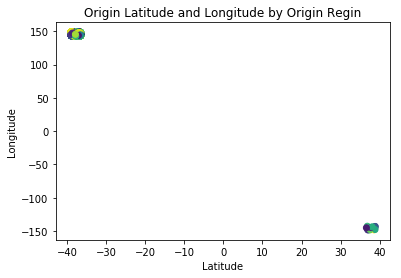

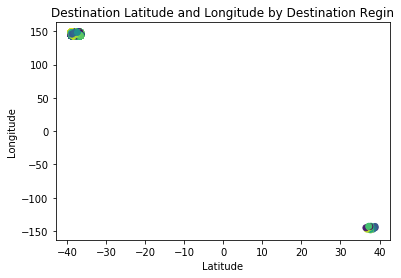

In [1324]:
#Scatter plot for Origin 
plt.scatter(x='Origin Latitude',y='Origin Longitude', data=myfile,c='Origin Region' )
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Origin Latitude and Longitude by Origin Regin')
plt.show()

#Scatter plot for destination
plt.scatter(x='Destination Latitude',y='Destination Longitude', data=myfile,c='Destination Region' )
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Destination Latitude and Longitude by Destination Regin')
plt.show()

As we can see from the above plots, there are some errors in the lattitude and longitude values as it is not possible to have negative longitudes and positive latitudes in Victoria, Australia

### Fixing the errors in the latitudes and longitudes and plotting the result

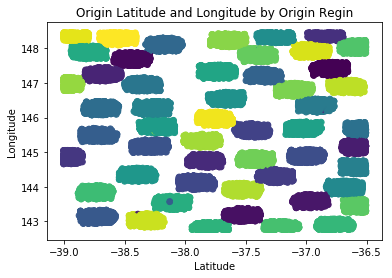

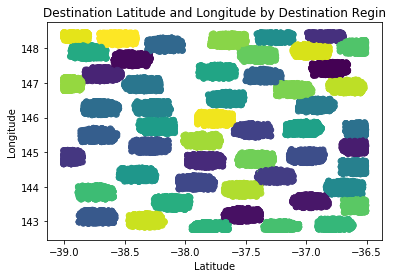

In [1355]:
#Changing the negative and positive values for latitudes and longitudes
myfile.loc[myfile['Origin Latitude']>1,'Origin Latitude']=myfile['Origin Latitude']*-1
myfile.loc[myfile['Destination Latitude']>1,'Destination Latitude']=myfile['Destination Latitude']*-1
myfile.loc[myfile['Origin Longitude']<1,'Origin Longitude']=myfile['Origin Longitude']*-1
myfile.loc[myfile['Destination Longitude']<1,'Destination Longitude']=myfile['Destination Longitude']*-1

#Plotting the given result to verify
#myfile.to_csv('correct.csv')
plt.scatter(x='Origin Latitude',y='Origin Longitude', data=myfile,c='Origin Region' )
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Origin Latitude and Longitude by Origin Regin')
plt.show()

plt.scatter(x='Destination Latitude',y='Destination Longitude', data=myfile,c='Destination Region' )
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Destination Latitude and Longitude by Destination Regin')
plt.show()


Now we can see that there are no lattitude that are  positive and longitude values that are negative as was the case earlier

### Checking for possibility of errors in Origin and Destination region

C:\Users\sidha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


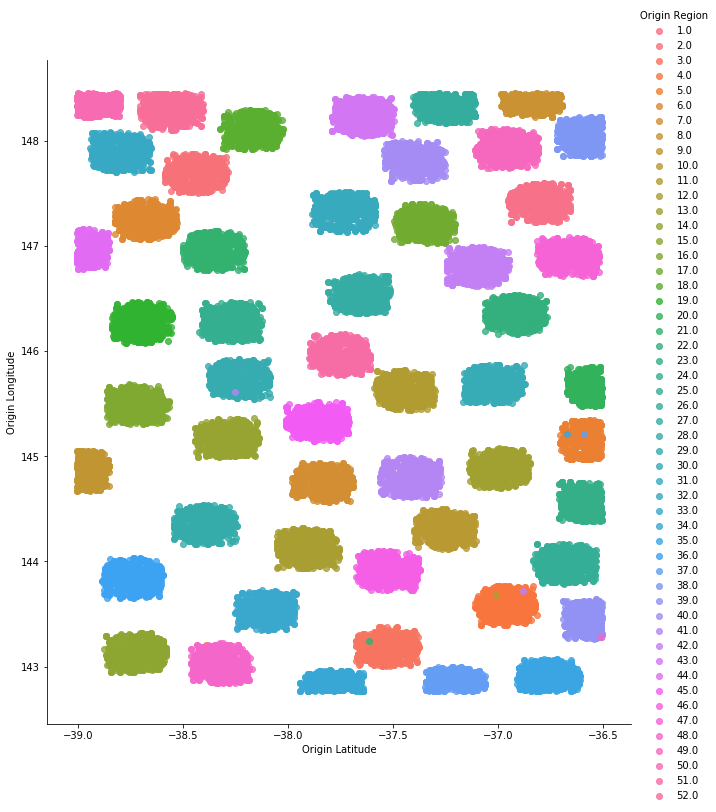

In [1202]:
plot1 = sns.lmplot(x='Origin Latitude',y='Origin Longitude', data=myfile, hue='Origin Region',fit_reg=False,size=10, aspect=.9)
plot1

C:\Users\sidha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


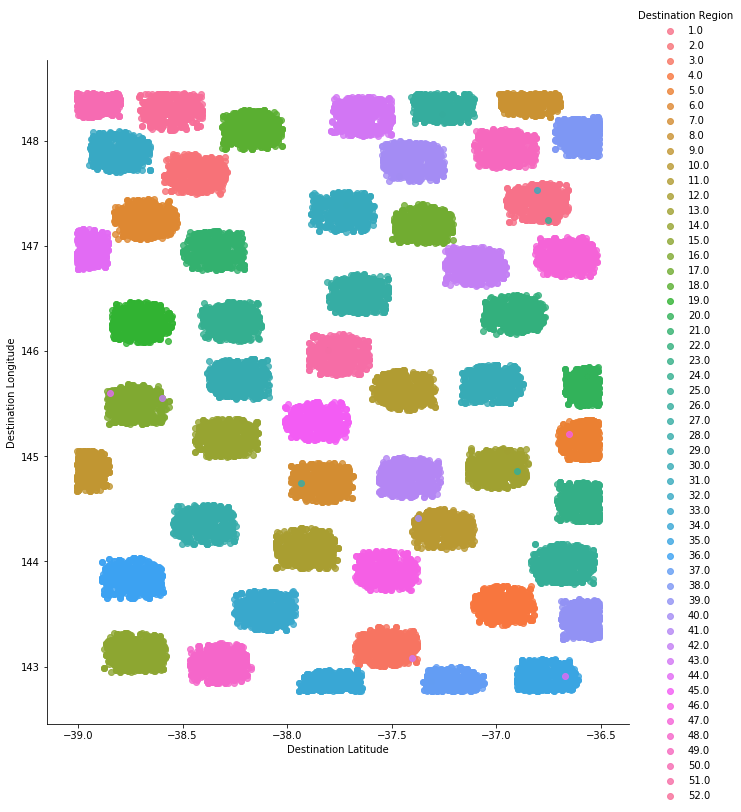

In [1203]:
plot2 = sns.lmplot(x='Destination Latitude',y='Destination Longitude', data=myfile, hue='Destination Region',fit_reg=False,size=10, aspect=.9)
plot2

From the above plots, we can see that that there are some mis-classified origin regions that actually belong to some other regions assuming that their latitude and longitude values are correct. 

### Using K-nearest neighbours (KNN) to try and classify the origin and destination region correctly based on Latitude and Longitude

In [1356]:
#KNN on the origin region
from  sklearn.neighbors import KNeighborsClassifier

#Removing null values for prediction
df=myfile[myfile['Origin Region'].isna()==False]

X=df[['Origin Latitude','Origin Longitude']]
Y=df[['Origin Region']]
neigh = KNeighborsClassifier()
neigh.fit(X,Y)
#Predicting the Origin Region based on nearest neighbours 
myfile['predicted_origin_region']=neigh.predict(myfile[['Origin Latitude','Origin Longitude']])

C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


C:\Users\sidha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


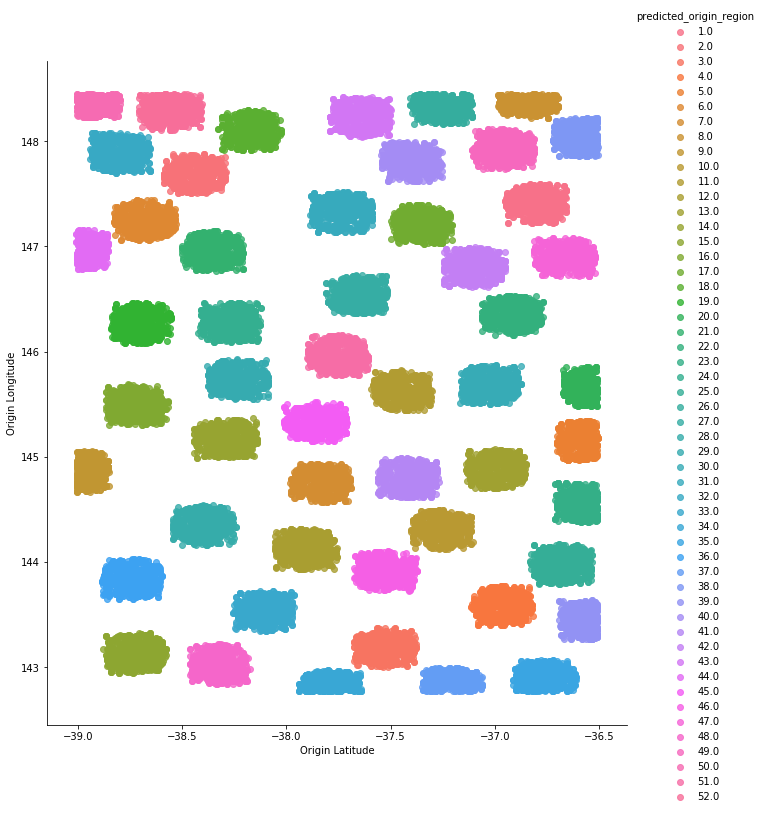

In [1205]:
#plotting to verify the result for Origin region
plot3 = sns.lmplot(x='Origin Latitude',y='Origin Longitude', data=myfile, hue='predicted_origin_region',fit_reg=False,size=10, aspect=.9)
plot3

There seems to be no false classification taking place in the predicited origin region column

In [1357]:
#Similarly, KNN on destination region

#Removing null values for prediction
df2=myfile[myfile['Destination Region'].isna()==False]
X=df2[['Destination Latitude','Destination Longitude']]
Y=df2[['Destination Region']]
neigh = KNeighborsClassifier()
neigh.fit(X,Y)
myfile['predicted_destination_region']=neigh.predict(myfile[['Destination Latitude','Destination Longitude']])


C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


C:\Users\sidha\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


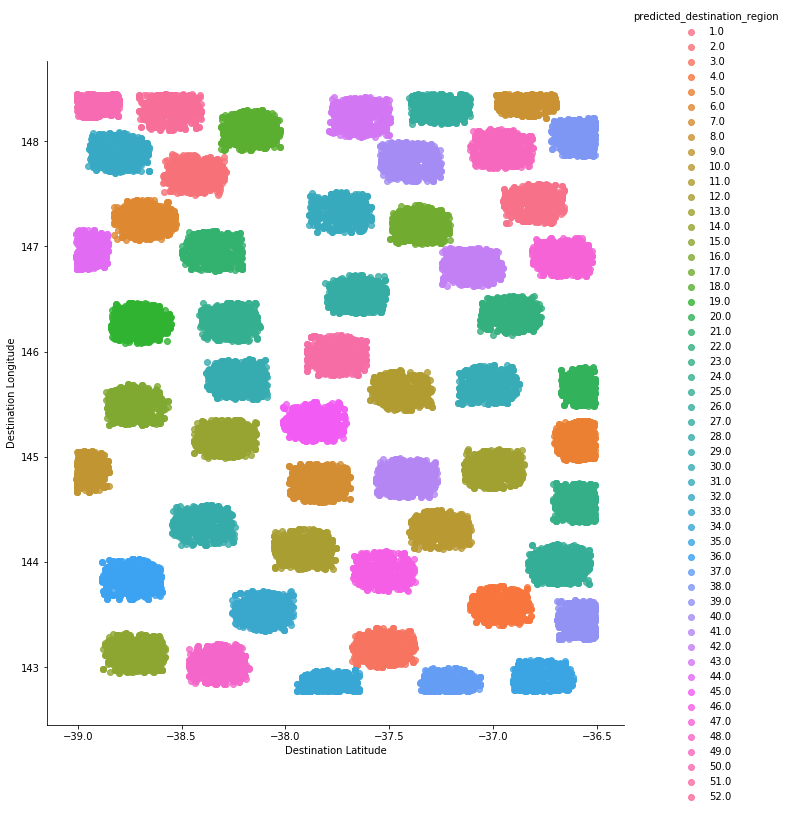

In [1207]:
#plotting to verify the result for Destination region
plot4 = sns.lmplot(x='Destination Latitude',y='Destination Longitude', data=myfile, hue='predicted_destination_region',fit_reg=False,size=10, aspect=.9)
plot4

Again, there seems to be no false classification taking place in the predicited destination region column

In [1358]:
#Replacing the predicted columns with the original values 
myfile['Origin Region']=myfile['predicted_origin_region']
myfile['Destination Region']=myfile['predicted_destination_region']

In [1359]:
#Dropping the predicted columns
myfile=myfile.drop(['predicted_origin_region','predicted_destination_region','Departure Date2'], axis=1)

### Checking for possible errors in Post Type
There seems to be a relation with the first digit of Id and the posttype

id_3           1      5
Post Type              
0.0        26225     27
1.0           13  11337


C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CDC5452E8>,
      dtype=object)

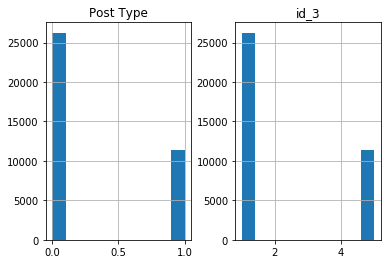

In [1360]:
#Checking for any relation between the first numeric of Id and posttype

#Subsetting the Id and posttype
posttype=myfile[['Id','Post Type']]

#Taking the first numeric of Id and putting it in a separate column
posttype['id_3']=pd.to_numeric(posttype['Id'].str[2])

#Printing a cross-tab matrix to find any patterns if present
print(pd.crosstab(posttype['Post Type'], posttype['id_3']))

posttype.hist()

We can see from the cross tab matrix that more than 99% of the data follows a pattern where:   

1. If the id begins with 1, the Post Type for that ID seems to be 0  
2. If the id begins with 5, the Post Type for that ID seems to be 1  

Using this pattern to fix the remaining post types as well as imputing the missing values of post type along with it


In [1361]:
#Fixing the remaining post types based on the above results and also imputing the missing values
posttype.loc[posttype['id_3']==5,'Post Type']=1
posttype.loc[posttype['id_3']==1,'Post Type']=0
posttype['Post Type']=posttype['Post Type'].fillna(posttype['id_3'])

#posttype.loc[posttype['id_3']==1,'Post Type']=0

print('Number of missing values in post type after imputation: ' + str (posttype['Post Type'].isna().sum())+ '\n')

#Verifying the results
print(pd.crosstab(posttype['Post Type'], posttype['id_3']))

#Imputing the values back in the DataFrame
myfile['Post Type']=posttype['Post Type']


C:\Users\sidha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Number of missing values in post type after imputation: 0

id_3           1      5
Post Type              
0.0        26250      0
1.0            0  11372


C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Verifying the Journey Distance using the Haversine Formula to compute the distance between 2 pairs of latitudes and longitudes

In [1362]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378 * c
    return km


#Using the above function to calculate the journey distacne
myfile['calculated dist']=haversine_np( myfile['Origin Longitude'],myfile['Origin Latitude'],myfile['Destination Longitude'],myfile['Destination Latitude'])
#Rounding the values to 3 digits
myfile['calculated dist']=myfile['calculated dist'].round(3)
#REFERENCED

In [1363]:
#Checking the number of incorrect Journey distances
asd=myfile
asd['error']=asd['Journey Distance']-asd['calculated dist']
asd2=asd[asd['error']>.1]
asd2
asd2[['Id', 'Journey Distance','calculated dist','error']] 

,Id,Journey Distance,calculated dist,error
43,ID5485656183,361.989,353.889,8.1
382,ID5149910214,112.413,102.513,9.9
7892,ID5424760482,165.617,156.617,9.0
8452,ID5752335503,130.646,122.546,8.1
10496,ID1399382598,261.370,258.070,3.3
28936,ID1239379129,115.252,108.352,6.9
30971,ID5153908709,341.838,339.738,2.1
37114,ID5125992031,477.282,469.882,7.4
37590,ID1890452231,189.534,185.834,3.7


In [1364]:
#Assigning the clculated values to the Journey Distance
myfile['Journey Distance']=myfile['calculated dist']

#Dropping the newly introduced columns
myfile=myfile.drop(['calculated dist', 'error'], axis=1)


In [1215]:
myfile.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1471251440,1.0,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,201.362,2018-01-28,07:03:59,201.72,10:25:42,93.83
1,ID5809009983,1.0,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,241.409,2018-03-05,15:28:21,240.48,19:28:49,153.39
2,ID1751041840,1.0,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,467.978,2018-04-23,14:43:45,459.74,22:23:29,131.37
3,ID1597582772,2.0,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,241.471,2018-04-14,01:12:05,236.64,5:08:43,177.76
4,ID1181129613,1.0,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,9.815,2018-07-28,04:28:31,16.35,4:44:52,116.36


### Calculating the travel time to verify, using the departure and delivery time

In [1365]:
#Converting the dates to datetime objects and keeping only the date using dt.date
myfile['Departure Time']=pd.to_datetime(myfile['Departure Time']).dt.time
myfile['Delivery Time']=pd.to_datetime(myfile['Delivery Time']).dt.time

#Function to subtract two times
def duration(end, start):
    duration = datetime.combine(date.min, end) - datetime.combine(date.min, start)
    return duration

#Using the above function to subtract delivery time fro departure time
myfile['Calculated Travel Time'] = myfile.apply(lambda row: duration(row['Delivery Time'], row['Departure Time']),axis=1)

In [1217]:
myfile.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Calculated Travel Time
0,ID1471251440,1.0,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,201.362,2018-01-28,07:03:59,201.72,10:25:42,93.83,03:21:43
1,ID5809009983,1.0,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,241.409,2018-03-05,15:28:21,240.48,19:28:49,153.39,04:00:28
2,ID1751041840,1.0,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,467.978,2018-04-23,14:43:45,459.74,22:23:29,131.37,07:39:44
3,ID1597582772,2.0,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,241.471,2018-04-14,01:12:05,236.64,05:08:43,177.76,03:56:38
4,ID1181129613,1.0,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,9.815,2018-07-28,04:28:31,16.35,04:44:52,116.36,00:16:21


Since the given travel time is in minutes, we need to convert the dalculate delvery time from HH:MM:SS to minutes

In [1366]:
#A function to convert the calculated travel time to minutes
def minutes(c_time):
    seconds = c_time.total_seconds()
    return seconds/60

#Calculating travel time from the function and rounding off to 2 digits
myfile['Calculated Travel Time'] = myfile['Calculated Travel Time'].apply(minutes).round(2)
myfile['Travel Time']=round(myfile['Travel Time'],2)


In [1367]:
myfile.loc[myfile['Travel Time'].isnull()]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Departure Hour,Calculated Travel Time
2141,ID1797873206,1.0,0.0,10.447,7.0,43.0,-37.789797,144.901992,-37.565678,148.316997,301.888,2018-07-16,03:40:43,NaN,08:39:43,136.63,3.0,299.00
2148,ID5628028440,1.0,1.0,54.456,30.0,37.0,-37.127706,145.584674,-37.282014,142.855116,242.608,2018-06-15,17:30:57,NaN,21:32:35,682.47,17.0,241.63
2186,ID1930383872,1.0,0.0,32.367,13.0,22.0,-36.886084,144.807119,-36.917189,146.488453,149.705,2018-02-04,03:27:12,NaN,05:58:55,123.74,3.0,151.72
6575,ID1573938016,1.0,0.0,35.890,4.0,49.0,-37.041949,143.590328,-37.004722,147.809481,374.967,2018-05-07,21:05:27,NaN,03:15:10,144.14,21.0,-1070.28
6604,ID1548993401,2.0,0.0,29.813,20.0,49.0,-36.539570,145.623340,-37.040505,147.986314,217.900,2018-04-01,22:08:28,NaN,01:42:39,169.21,22.0,-1225.82
8278,ID1390461707,3.0,0.0,40.681,27.0,11.0,-37.719327,146.473481,-37.388159,145.758307,73.091,2018-03-18,22:07:54,NaN,23:14:07,200.02,22.0,66.22
8651,ID1527941249,2.0,0.0,17.753,46.0,5.0,-37.605665,143.842897,-36.613459,145.188251,162.671,2018-05-24,18:23:26,NaN,21:05:01,144.24,18.0,161.58
10322,ID1189146459,1.0,0.0,40.940,38.0,18.0,-36.559975,148.003524,-38.163830,148.034627,178.558,2018-05-02,21:55:35,NaN,00:55:14,131.26,21.0,-1260.35
10672,ID1250693734,3.0,0.0,30.251,14.0,38.0,-38.428895,144.991898,-36.718294,148.083680,332.634,2018-01-07,22:33:36,NaN,03:10:15,219.60,22.0,-1163.35
12396,ID5709837356,3.0,1.0,14.714,8.0,5.0,-36.860355,148.413567,-36.527479,145.329737,277.728,2018-05-23,20:43:06,NaN,00:35:14,234.43,20.0,-1207.87


In [1220]:
myfile.isna().sum()

Id                         0
Drone Type                10
Post Type                  0
Package Weight             0
Origin Region              0
Destination Region         0
Origin Latitude            0
Origin Longitude           0
Destination Latitude       0
Destination Longitude      0
Journey Distance           0
Departure Date             0
Departure Time             0
Travel Time               40
Delivery Time              0
Delivery Fare             30
Calculated Travel Time     0
dtype: int64

In [1221]:
myfile.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Calculated Travel Time
0,ID1471251440,1.0,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,201.362,2018-01-28,07:03:59,201.72,10:25:42,93.83,201.72
1,ID5809009983,1.0,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,241.409,2018-03-05,15:28:21,240.48,19:28:49,153.39,240.47
2,ID1751041840,1.0,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,467.978,2018-04-23,14:43:45,459.74,22:23:29,131.37,459.73
3,ID1597582772,2.0,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,241.471,2018-04-14,01:12:05,236.64,05:08:43,177.76,236.63
4,ID1181129613,1.0,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,9.815,2018-07-28,04:28:31,16.35,04:44:52,116.36,16.35


### Fixing Travel Time and Drone Type

In [1368]:
#Creating a subset of the main df where the calculated time is almost identical to the given df
a=myfile.loc[(myfile['Travel Time']-myfile['Calculated Travel Time']).abs()<=0.05]


In [1223]:
len(a)

32024

In [1369]:
#Creating 3 separate dataframes containing data for each specific drone type
drone1=a[a['Drone Type']==1]
drone2=a[a['Drone Type']==2]
drone3=a[a['Drone Type']==3]


Since we are given that it takes 5 minutes for drone to take off and 5 minutes for landing, subtracting this time to find out the on-route time

In [1370]:
#Subtracting take-off and landing time
drone1['On route Travel Time']=drone1['Calculated Travel Time']-10
drone2['On route Travel Time']=drone2['Calculated Travel Time']-10
drone3['On route Travel Time']=drone3['Calculated Travel Time']-10

C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

According to the formula explained in the lecture:  

### 5*(Beta) + (tt-10)*(z) = JD,where   
Beta=x+y(take-off and landing speed respectively)  
tt= travel time of that row  
z = On-route speed  
JD = Total journey distance of that row  

We will use 2 simultaneous linear equations to get the value for Beta and z, FOR EACH DRONE TYPE


In [1371]:
time1=drone1['On route Travel Time']
time2=drone2['On route Travel Time']
time3=drone3['On route Travel Time']

JD1=drone1['Journey Distance']
JD2=drone2['Journey Distance']
JD3=drone3['Journey Distance']


In [303]:
JD3.head()

6     353.975
7     184.498
8     161.738
10    161.343
14    119.568
Name: Journey Distance, dtype: float64

Using the formula given in the lecture:   

5*(Beta) + (Travel Time-10)z = Journey Distance , where  
Beta = Take-off and landing speed  
z = On-route speed  


In [1227]:
time3.head()

6     283.97
7     146.55
8     128.08
10    127.77
14     93.90
Name: On route Travel Time, dtype: float64

In [1228]:
myfile.isna().sum()

Id                         0
Drone Type                10
Post Type                  0
Package Weight             0
Origin Region              0
Destination Region         0
Origin Latitude            0
Origin Longitude           0
Destination Latitude       0
Destination Longitude      0
Journey Distance           0
Departure Date             0
Departure Time             0
Travel Time               40
Delivery Time              0
Delivery Fare             30
Calculated Travel Time     0
dtype: int64

From the above formula, we can find Travel Time for each drone type by solving for beta and z for each drone type in simultaneous linear equations by taking the value of z and JD from 1st two rows of each subset of drone type

In [1372]:
myfile['travel_time_1']=(((myfile['Journey Distance']-(5*0.64499))/(1.0335)) + 10).round(2)
myfile['travel_time_2']=(((myfile['Journey Distance']-(5*0.69979))/(1.0500)) + 10).round(2)
myfile['travel_time_3']=(((myfile['Journey Distance']-(5*0.75223))/(1.2333)) + 10).round(2)

In [1373]:
myfile['error1']=(myfile['Travel Time']-myfile['travel_time_1']).abs()
myfile['error2']=(myfile['Travel Time']-myfile['travel_time_2']).abs()
myfile['error3']=(myfile['Travel Time']-myfile['travel_time_3']).abs()


In [1231]:
myfile.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Travel Time,Delivery Time,Delivery Fare,Calculated Travel Time,travel_time_1,travel_time_2,travel_time_3,error1,error2,error3
0,ID1471251440,1.0,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,...,201.72,10:25:42,93.83,201.72,201.71,198.44,170.22,0.01,3.28,31.50
1,ID5809009983,1.0,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,...,240.48,19:28:49,153.39,240.47,240.46,236.58,202.69,0.02,3.90,37.79
2,ID1751041840,1.0,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,...,459.74,22:23:29,131.37,459.73,459.69,452.36,386.40,0.05,7.38,73.34
3,ID1597582772,2.0,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,...,236.64,05:08:43,177.76,236.63,240.52,236.64,202.74,3.88,0.00,33.90
4,ID1181129613,1.0,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,...,16.35,04:44:52,116.36,16.35,16.38,16.02,14.91,0.03,0.33,1.44


In [1374]:
#Calculating the drone type by comparing all the 3 values of time taken for each drone type with the given travel time
myfile['calc_drone']=''

#Considering a threshold of 0.06, if a error of time taken of that drone type is less than 0.06 replace the drone type
#with the column number of that column as it represents its drone type
myfile.loc[(myfile['error1']<0.06) & (myfile['error1']<myfile['error2']) & (myfile['error1']<myfile['error3']),'calc_drone']=1
myfile.loc[(myfile['error2']<0.06) & (myfile['error2']<myfile['error3']) & (myfile['error2']<myfile['error1']),'calc_drone']=2
myfile.loc[(myfile['error3']<0.06) & (myfile['error3']<myfile['error1']) & (myfile['error3']<myfile['error2']),'calc_drone']=3


In [1375]:
#Checking for values of predicted drone type that do not match the given Drone type
a=myfile[myfile['Drone Type']!=myfile['calc_drone']]
b=a[['Drone Type','calc_drone','error1','error2','error3','Travel Time','Calculated Travel Time','travel_time_1','travel_time_2','travel_time_3']]
b.head()

,Drone Type,calc_drone,error1,error2,error3,Travel Time,Calculated Travel Time,travel_time_1,travel_time_2,travel_time_3
181,1.0,,0.06,7.88,78.42,491.11,491.10,491.05,483.23,412.69
333,1.0,,0.06,7.92,78.88,493.95,493.93,493.89,486.03,415.07
566,1.0,,0.06,7.95,79.16,495.66,495.65,495.60,487.71,416.50
608,1.0,2,1.99,0.01,16.25,117.94,117.93,119.93,117.95,101.69
612,1.0,2,4.65,0.00,40.98,284.33,284.32,288.98,284.33,243.35


In [1234]:
b.shape

(176, 10)

We can see in the above df that there are some blank values of predicted drone type, which means the error in the predicted time did not match the threshold for any of the drone type, which means the time taken value would be incorrect, which is corrected later.

In [1235]:
b.isna().sum()

Drone Type                10
calc_drone                 0
error1                    40
error2                    40
error3                    40
Travel Time               40
Calculated Travel Time     0
travel_time_1              0
travel_time_2              0
travel_time_3              0
dtype: int64

In [1376]:
#Exploring the blank values of the calculated drone type
myfile.loc[(myfile['calc_drone']=='')]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Delivery Fare,Departure Hour,Calculated Travel Time,travel_time_1,travel_time_2,travel_time_3,error1,error2,error3,calc_drone
181,ID5203068110,1.0,1.0,33.754,34.0,52.0,-37.693902,142.824342,-38.523269,148.440246,...,194.09,2.0,491.10,491.05,483.23,412.69,0.06,7.88,78.42,
333,ID1439806093,1.0,0.0,15.440,52.0,37.0,-38.506045,148.305781,-37.086102,142.872022,...,115.97,8.0,493.93,493.89,486.03,415.07,0.06,7.92,78.88,
566,ID1220213637,1.0,0.0,17.716,50.0,34.0,-39.003099,148.450336,-37.816691,142.860016,...,113.50,10.0,495.65,495.60,487.71,416.50,0.06,7.95,79.16,
1068,ID1265000761,1.0,0.0,20.388,35.0,50.0,-36.624037,142.816036,-38.824832,148.268700,...,118.60,11.0,528.32,528.27,519.86,443.87,0.06,8.47,84.46,
1222,ID5159296703,1.0,1.0,17.925,49.0,34.0,-36.976033,148.105485,-37.911404,142.785924,...,149.80,10.0,472.78,472.73,465.20,397.33,0.06,7.59,75.46,
1517,ID1387353518,1.0,0.0,45.530,18.0,35.0,-38.214865,148.118343,-36.623626,142.823176,...,141.40,13.0,491.13,491.09,483.27,412.72,0.06,7.88,78.43,
2128,ID5198427118,1.0,1.0,30.266,52.0,39.0,-38.565429,148.409936,-36.547201,143.332568,...,172.82,13.0,491.82,491.76,483.93,413.28,0.06,7.89,78.54,
2141,ID1797873206,1.0,0.0,10.447,7.0,43.0,-37.789797,144.901992,-37.565678,148.316997,...,136.63,3.0,299.00,298.98,294.18,251.73,NaN,NaN,NaN,
2148,ID5628028440,1.0,1.0,54.456,30.0,37.0,-37.127706,145.584674,-37.282014,142.855116,...,682.47,17.0,241.63,241.62,237.72,203.66,NaN,NaN,NaN,
2186,ID1930383872,1.0,0.0,32.367,13.0,22.0,-36.886084,144.807119,-36.917189,146.488453,...,123.74,3.0,151.72,151.73,149.24,128.34,NaN,NaN,NaN,


In [1377]:
#Substituing the
myfile.loc[(myfile['calc_drone']!=''),'Drone Type']=myfile['calc_drone']

In [1285]:
myfile.isna().sum()

Id                         0
Drone Type                 0
Post Type                  0
Package Weight             0
Origin Region              0
Destination Region         0
Origin Latitude            0
Origin Longitude           0
Destination Latitude       0
Destination Longitude      0
Journey Distance           0
Departure Date             0
Departure Time             0
Travel Time               40
Delivery Time              0
Delivery Fare             30
Calculated Travel Time     0
travel_time_1              0
travel_time_2              0
travel_time_3              0
error1                    40
error2                    40
error3                    40
calc_drone                 0
dtype: int64

In [1378]:
#Correct Time using the imputed drone type
myfile['Cal Correct TT']=''
myfile.loc[(myfile['Drone Type']==1),'Cal Correct TT']=(((myfile['Journey Distance']-5*(0.64499))/1.0335) + 10).round(2)
myfile.loc[(myfile['Drone Type']==2),'Cal Correct TT']=(((myfile['Journey Distance']-5*(0.69979))/1.05) + 10).round(2)
myfile.loc[(myfile['Drone Type']==3),'Cal Correct TT']=(((myfile['Journey Distance']-5*(0.75224))/1.2333)+ 10).round(2)


In [1287]:
myfile['Drone Type'].unique()

array([1, 2, 3], dtype=object)

In [1379]:
#Dropping the imputed columns
myfile=myfile.drop(['travel_time_1', 'travel_time_2','travel_time_3','error1','error2', 'error3', 'calc_drone',], axis=1)


In [1380]:
myfile.isna().sum()


Id                         0
Drone Type                 0
Post Type                  0
Package Weight             0
Origin Region              0
Destination Region         0
Origin Latitude            0
Origin Longitude           0
Destination Latitude       0
Destination Longitude      0
Journey Distance           0
Departure Date             0
Departure Time             0
Travel Time               40
Delivery Time              0
Delivery Fare             30
Departure Hour             0
Calculated Travel Time     0
Cal Correct TT             0
dtype: int64

In [1381]:
#Checking the maximum error in Travel Time
myfile['Error']=(myfile2['Travel Time'] - myfile['Cal Correct TT']).abs()
max(myfile['Error'])


0.06000000000005912

In [1382]:
#Imputing the  travel time with the calculated travel time
myfile['Travel Time']=myfile['Cal Correct TT']
myfile.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Departure Hour,Calculated Travel Time,Cal Correct TT,Error
0,ID1471251440,1,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,201.362,2018-01-28,07:03:59,201.71,10:25:42,93.83,7.0,201.72,201.71,0.01
1,ID5809009983,1,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,241.409,2018-03-05,15:28:21,240.46,19:28:49,153.39,15.0,240.47,240.46,0.02
2,ID1751041840,1,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,467.978,2018-04-23,14:43:45,459.69,22:23:29,131.37,14.0,459.73,459.69,0.05
3,ID1597582772,2,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,241.471,2018-04-14,01:12:05,236.64,05:08:43,177.76,1.0,236.63,236.64,0
4,ID1181129613,1,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,9.815,2018-07-28,04:28:31,16.38,04:44:52,116.36,4.0,16.35,16.38,0.03


In [1383]:
#Again dropping the unneccesary columns
myfile=myfile.drop(['Error', 'Calculated Travel Time','Cal Correct TT'], axis=1)
#myfile=myfile_backup
#myfile_backup=myfile

Creating a new variable as daytime for linear regression to store departure time as a categorical variable  
Morning (6:00:00 - 11:59:59) as 1
afternoon(12:00:00 - 20:59:59) as 2 
night (21:00 - 5:59:59) as 3


In [1384]:
myfile.loc[((myfile['Departure Hour'] >= 6) & (myfile['Departure Hour'] < 12)), 'daytime'] = 1
myfile.loc[(myfile['Departure Hour'] >=12) & (myfile['Departure Hour'] <= 20), 'daytime'] = 2
myfile.loc[((myfile['Departure Hour'] > 20) & (myfile['Departure Hour'] < 25)) | ((myfile['Departure Hour'] >= 0) & (myfile['Departure Hour'] < 6)) , 'daytime'] = 3                                             

In [1296]:
myfile.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Departure Hour,daytime
0,ID1471251440,1,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,201.362,2018-01-28,07:03:59,201.71,10:25:42,93.83,7.0,1.0
1,ID5809009983,1,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,241.409,2018-03-05,15:28:21,240.46,19:28:49,153.39,15.0,2.0
2,ID1751041840,1,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,467.978,2018-04-23,14:43:45,459.69,22:23:29,131.37,14.0,2.0
3,ID1597582772,2,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,241.471,2018-04-14,01:12:05,236.64,05:08:43,177.76,1.0,3.0
4,ID1181129613,1,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,9.815,2018-07-28,04:28:31,16.38,04:44:52,116.36,4.0,3.0


### Linear regression to predict Delivery Fare

In [1385]:
#Taking only full cases to put in the linear regression
fullcase=myfile
fullcase=fullcase.dropna(subset=['Delivery Fare'])
fullcase.isna().sum()
fullcase.shape


(37592, 18)

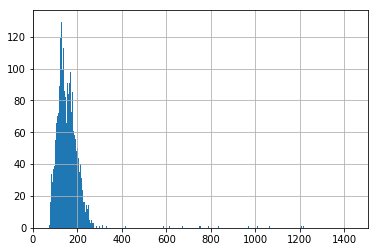

In [1386]:
#Checking for outliers in Delivery Fare'
myfile['Delivery Fare'].hist(bins=5000)


In [1387]:
#Removing outliers with values more than 99% Quantile of Delivery Fare for the linear regression Model
q = myfile["Delivery Fare"].quantile(0.99)
fullcase=fullcase[fullcase["Delivery Fare"] < q]
fullcase.shape
fullcase.isna().sum()

Id                       0
Drone Type               0
Post Type                0
Package Weight           0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance         0
Departure Date           0
Departure Time           0
Travel Time              0
Delivery Time            0
Delivery Fare            0
Departure Hour           0
daytime                  0
dtype: int64

In [1388]:
#Packages required for linear regression model
from sklearn import linear_model
from sklearn.cross_validation import train_test_split


#Converting the variables to factors 
fullcase["Drone Type"] = fullcase["Drone Type"].astype('category')
fullcase["Post Type"] = fullcase["Post Type"].astype('category')

#Using linear regression model to fit on the data
lm = linear_model.LinearRegression()

y=fullcase[['Delivery Fare']]
X=fullcase[['Drone Type','Post Type','Journey Distance','Package Weight', 'Travel Time','daytime']]


In [1389]:
#Splitting the data to training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=1/3,random_state=0)

#Fitting in the model on the training data
model = lm.fit(X_train, y_train)
#Checking the score of the fitted model
model.score(X_train, y_train)

0.9898207668248845

With a score over 95, we can be sure our predicted Delivery fare are pretty accurate, and we can impute missing values of Delivery fare in the main df using this.

In [1390]:
#Predicting using the model on test data
y_pred = lm.predict(X_test)

#Using the coeffients to predict all the values
myfile['New Fare']=lm.predict(myfile[['Drone Type','Post Type','Journey Distance','Package Weight', 'Travel Time','daytime']])
myfile.loc[(myfile['Delivery Fare'].isnull()),'Delivery Fare']= myfile['New Fare']


In [1391]:
#Dropping imputed variables
myfile=myfile.drop(['daytime', 'Departure Hour', 'New Fare'], axis=1)

In [1392]:
myfile.isna().sum()

Id                       0
Drone Type               0
Post Type                0
Package Weight           0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance         0
Departure Date           0
Departure Time           0
Travel Time              0
Delivery Time            0
Delivery Fare            0
dtype: int64

In [1393]:
#Checking the datatype of the objects
myfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37622 entries, 0 to 37629
Data columns (total 16 columns):
Id                       37622 non-null object
Drone Type               37622 non-null object
Post Type                37622 non-null float64
Package Weight           37622 non-null float64
Origin Region            37622 non-null float64
Destination Region       37622 non-null float64
Origin Latitude          37622 non-null float64
Origin Longitude         37622 non-null float64
Destination Latitude     37622 non-null float64
Destination Longitude    37622 non-null float64
Journey Distance         37622 non-null float64
Departure Date           37622 non-null object
Departure Time           37622 non-null object
Travel Time              37622 non-null object
Delivery Time            37622 non-null object
Delivery Fare            37622 non-null float64
dtypes: float64(10), object(6)
memory usage: 6.1+ MB


In [1394]:
#Converting the datatype back to the original datatype
myfile['Drone Type'] = myfile['Drone Type'].astype(float)
myfile['Travel Time'] = myfile['Travel Time'].astype(float)


In [1395]:
#Verifyingthe datatype of the objects
myfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37622 entries, 0 to 37629
Data columns (total 16 columns):
Id                       37622 non-null object
Drone Type               37622 non-null float64
Post Type                37622 non-null float64
Package Weight           37622 non-null float64
Origin Region            37622 non-null float64
Destination Region       37622 non-null float64
Origin Latitude          37622 non-null float64
Origin Longitude         37622 non-null float64
Destination Latitude     37622 non-null float64
Destination Longitude    37622 non-null float64
Journey Distance         37622 non-null float64
Departure Date           37622 non-null object
Departure Time           37622 non-null object
Travel Time              37622 non-null float64
Delivery Time            37622 non-null object
Delivery Fare            37622 non-null float64
dtypes: float64(12), object(4)
memory usage: 6.1+ MB


In [1396]:
myfile.head()


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1471251440,1.0,0.0,46.124,10.0,24.0,-37.248577,144.462153,-38.373328,146.255488,201.362,2018-01-28,07:03:59,201.71,10:25:42,93.83
1,ID5809009983,1.0,1.0,44.373,28.0,20.0,-38.412837,144.457607,-36.536657,145.828310,241.409,2018-03-05,15:28:21,240.46,19:28:49,153.39
2,ID1751041840,1.0,0.0,11.942,48.0,50.0,-38.398325,143.068291,-38.901859,148.413367,467.978,2018-04-23,14:43:45,459.69,22:23:29,131.37
3,ID1597582772,2.0,0.0,39.338,36.0,30.0,-38.709436,143.815376,-37.079459,145.629345,241.471,2018-04-14,01:12:05,236.64,05:08:43,177.76
4,ID1181129613,1.0,0.0,42.312,3.0,3.0,-37.632102,143.122302,-37.633874,143.233612,9.815,2018-07-28,04:28:31,16.38,04:44:52,116.36


In [1397]:
myfile.shape

(37622, 16)

In [1398]:
myfile.to_csv('29330750_solution.csv')